# Exploring Statistical Methods: Permutations, Distributions, and Hypothesis Testing

In this assignment, we will explore several fundamental statistical techniques using Python and the numpy library. The four tasks cover a range of methods useful for analyzing data and performing hypothesis tests:

**Task 1: Permutations and Combinations** — We will calculate and understand the concepts of permutations and combinations, essential for combinatorial probability.  

**Task 2: numpy's Normal Distribution** — This task will demonstrate how to use numpy to generate and visualize data following a normal distribution.  

**Task 3: t-Test Calculation** — We will perform a t-test to compare the means of two datasets and understand its significance.  

**Task 4: ANOVA** — This task will cover the Analysis of Variance (ANOVA) to assess the statistical differences between multiple groups.  

These tasks will provide a hands-on approach to understanding and applying statistical methods in Python.  

The first step will then be importing the necessary libraries that will allow all the above studies:

1. **math**:
   - The `math` library provides a set of mathematical functions such as logarithms, square roots, trigonometric functions, and constants (e.g., π). It's essential for carrying out basic mathematical operations that are required for statistical calculations, including those used in permutations and combinations, as well as other numerical analyses.

2. **itertools**:
   - The `itertools` library is used for creating iterators for efficient looping, such as calculating permutations and combinations. It provides functions like `permutations()` and `combinations()`, which are directly applicable in combinatorial analysis. This library helps in generating sequences without the need to manually implement the logic.

3. **random**:
   - The `random` library allows for random selections, which is necessary when dealing with sampling methods, such as simulating datasets, shuffling data, or generating random variables. It will be helpful for tasks like creating random samples from distributions or testing hypothesis.

4. **numpy**:
   - `numpy` is a core library for numerical computing in Python. It provides support for arrays and matrices, along with a vast range of mathematical functions for numerical operations. `numpy` is crucial for generating random data, performing array manipulations, and applying advanced mathematical functions—particularly when working with large datasets and statistical distributions, such as the normal distribution.

5. **matplotlib.pyplot**:
   - `matplotlib.pyplot` is a plotting library used to create static, animated, and interactive visualizations in Python. It is essential for graphing data distributions, such as visualizing the normal distribution or plotting results from hypothesis tests like the t-test or ANOVA. Visualizations are key to interpreting and presenting data clearly.

6. **scipy.stats**:
   - `scipy.stats` is a submodule of the `scipy` library that provides a comprehensive range of statistical functions. It includes tools for hypothesis testing, probability distributions, and statistical tests, such as the t-test and ANOVA. This library is vital for performing rigorous statistical analysis and hypothesis testing in the assignment.

7. **statsmodels**:
   - `statsmodels` is a library for statistical modeling, which includes tools for performing regression analysis, hypothesis testing, and statistical inference. It's useful for more advanced statistical models and tests that go beyond basic functions. This library will be beneficial when applying more complex statistical methods, like ANOVA or regression models.

8. **pandas**:
   - `pandas` is a powerful library for data manipulation and analysis, offering data structures like DataFrames and Series for handling structured data efficiently. It provides functions to clean, transform, and explore datasets, making it easier to preprocess data for statistical analysis or machine learning tasks. The library integrates well with other libraries like statsmodels and numpy, serving as a foundation for managing data in preparation for more advanced analyses. 

These libraries were chosen for their efficiency, broad usage in the data science community, and their ability to work seamlessly together to carry out the required tasks in the assignment.

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html#module-math
import math

# Permutations and combinations
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html#module-random
import random

# Numerical structures and operations.
# https://numpy.org/devdocs/reference/index.html#numpy-reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

# Mathematical functions.
import math

# Data manipulation.
import pandas as pd

# Task 1: Permutations and Combinations


    Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

    Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

    Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

    Would you accept two errors? Explain.

## Lady Tasting Tea

## Table of Contents

1. [NULL HYPOTHESIS](#null-hypothesis)
2. [QUESTION NO1](#question-no1)
- [ANSWER NO1](#answer-no1)
3. [QUESTION NO2](#question-no2)
- [ANSWER NO2](#answer-no2)
4. [QUESTION NO3](#question-no3)
- [ANSWER NO3](#answer-no3)

### NULL HYPOTHESIS

    The lady has no special powers in figuring it out and she is just guessing.

### QUESTION NO1

    Calculate, using Python, the probability that they select the correct six cups.

**Our *Null* Hypothesis asserts that the lady is guessing, meaning her selections are random. The probability under the null hypothesis represents the likelihood of randomly selecting the correct 6 cups without any real ability to distinguish between tea-first and milk-first.**

By conducting this experiment, we intend to prove whether the person’s ability to identify the preparation method of the tea cups is beyond random chance. If the person can consistently and accurately identify all six milk-first cups, the evidence would support the claim that they possess a special sensory ability. Conversely, if their success rate aligns with what would be expected by random guessing, the claim would lack statistical support.

In summary, this experiment serves as a practical application of hypothesis testing, allowing us to objectively evaluate extraordinary claims using statistical evidence.

*By setting up this experiment, we can:*

- **Quantify Confidence**: Determine the likelihood that the person’s success is due to random chance versus a genuine ability.
+ **Statistical Significance**: Establish whether the results are statistically significant, meaning the observed outcome is unlikely to have occurred under the null hypothesis.
* **Objective Evaluation**: Provide an objective framework to evaluate claims of special abilities, ensuring decisions are based on evidence and probability rather than subjective judgment.

![image](images/lady_tasting_tea.png)

The key concepts that can guide us to establish the statistical relevance of a test are the following:

### Permutations
    
A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.

### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

    -> In this case, since the experiment involves selecting cups where **order does not matter**, and **each cup is chosen without replacement**, the statistical relevance of the test is fundamentally  based on the concept of **combinations**. This ensures that the analysis focuses solely on the subsets of cups chosen, rather than the sequence in which they are selected.


Before assessing our *null* hypothesis we will proceed by calculating the number of ways to choose **k** elements from a set of **n** elements, 6 cups from a set of 12 cups in our case, where the order of the chosen elements does not matter and no element is selected more than once.

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk first.
no_cups_milk_first = 6

# Number of cups of tea with tea first.
no_cups_tea_first = 6

How many possible combinations are there to shuffle the 12 cups?  

In orther to identify the precise number we are using the [`math.comb()`](https://docs.python.org/3/library/math.html#math.comb') function from the *math* library.


In [3]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

The value 924 quantifies the total possible ways to arrange the selection of 6 milk-first cups among the 12 cups. This number is useful for determining the probability of correctly guessing the arrangement purely by chance, which can then be compared to the actual results to test statistical significance.

In mathematics, the **combination** function is called the *choose* function:


$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

* $n!$: The factorial of $n$  
We have 12 cups from which selecting the samples and the factorial of 12 is: 479001600.
1 * 2 * 3 * 4 * 5 * 6 * 7 * 8 * 9 * 10 * 11 * 12 = 479001600

In [4]:
#  Factorial of the total number of cups n.
fact_no_cups = 1 * 2 * 3 * 4 * 5 * 6 * 7 * 8 * 9 * 10 * 11 * 12

# Show.
fact_no_cups

479001600

* $k!$: The factorial of $k$  

We need to select 6 random cups and the possible ways these cups can be selected is represented by factorial of this same sample, 6: 720  

$k! = 6 x 5 x 4 x 3 x 2 x 1$

In [5]:
#  Factorial of the total number of cups n.
fact_samples = 1 * 2 * 3 * 4 * 5 * 6

# Show.
fact_samples

720

* $(n−k)!$: The factorial of the difference between $n$ and $k$ is 720 as well.

$(n - k)! = (12 -6)! = 6! = 6 x 5 x 4 x 3 x 2 x 1 = 720$

In [6]:
# Factorial of the diffetence between n and k.
fact_diff = 6 * 5 * 4 * 3 * 2 * 1

fact_diff

720

In [7]:
# Applying the combination formula.
no_total_selection = fact_no_cups // (fact_samples * fact_diff)

# Show.
no_total_selection

924

```  
n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1  
k! = 6 x 5 x 4 x 3 x 2 x 1  
(n - k)! = 6 x 5 x 4 x 3 x 2 x 1  
n!/(n-k) = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5  
```  

**The formula of COMBINATION** confirms the number of 924 as number of possible combinations **where the order does not matter**. 

On the contrary, in case we would consider the order of selection the number of possible outcomes would increase to 665280 following **the formula of PERMUTATION** => **where the order does matter**.  

The formula for permutations is:  

$$P(n, k) = \frac{n!}{(n-k)!}$$

In this case:

$n$=12 (total cups)  
$k$=6 (number of cups selected)  

Step-by-Step Simplification:
Start with the full factorial expression:  
$P(12, 6) = \frac{12!}{(12-6)!} = \frac{12!}{(6)!}$
 
Expand:

$12!$ and cancel out terms with $6!$:  

$12!=12×11×10×9×8×7×6!$

So, 6! in the numerator and denominator cancel out.  
Simplified expression:  

$P(12,6)=12×11×10×9×8×7$

In [8]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [9]:
# Number of ways of shuffling six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

720 ways of ordering 6 elements.

In [10]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

The [math.factorial](https://docs.python.org/3/library/math.html#math.factorial) function can provide a simpler and more efficient manner to apply the *choose* function.

In [11]:
# Number of cups
n = 12

# Number of cups of tea with milk/tea first.
k = 6

# Factorial on number of cups.
fact_n = math.factorial(n)

# Factorial of number of cups of tea with milk/tea first.
fact_k = math.factorial(k)

# Factorial of  number of cups - number of cups of tea with milk/tea first.
diff_n_k =  n-k
fact_diff_n_k = math.factorial(diff_n_k)

# Applying formula: COMBINATION
# No of ways of selecting k objects from n without replacement and without order.
comb = fact_n // (fact_k * fact_diff_n_k)

# Show result.
comb

924

The probability of selecting the correct 6 cups is based on the number of favorable outcomes (1 correct combination) divided by the total possible combinations is then calculated as follows:

$$P = \frac{\text{Number of Correct Combinations}}{\text{Total Combinations}}.$$

Substituting the values from above total combinations number (924) and the correct combinations (1 because there is only one way to select the 6 correct cup).

$$P = \frac{{1}}{{924}}$$

In [12]:
# Probability of selecting the correct 6 cups
probability_correct = 1 / comb

probability_correct

0.0010822510822510823

### ANSWER NO1 

Allowing no error in the identification of the correct 6 cups in a set of 6 cups randomly chosen out of 12 corresponds to a probability of approximately $0.108\% (P = \frac{{1}}{{924}})$ under the assumption that the lady is just guessing, which forms the basis of our Null Hypothesis.

A probability of 0.108% is considered high enough to reject the *Null Hypothesis* and accept the *Alternative Hypothesis*, namely, that the lady can tell the difference.

==> **EVIDENCE**

Fisher: if the lady is just picking six cups at random, then it is unlikely she will pick the correct six. The probability is one in nine hundred twenty-four. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea.

In [18]:
# The probability in percentage that she (randomly) selects the six correct cups.
cert_percentage = round((1 / 924) *100, 3)

# Show.
print(cert_percentage)

0.108


### QUESTION NO2

    Calculate the probability, assuming they have no special powers, that the person makes at most one error.

If we can calculate the probability of selecting all 6 correct cups by considering the single favorable case out of all possible combinations, **the number of favorable cases increases if we allow for the possibility of one error**. This is because there are multiple ways to select subsets of 6 cups where 5 cups are correct and 1 is incorrect. To compute this probability accurately, **we must consider and calculate the overlaps**, which represent the number of correctly identified cups within a selection. *Overlaps quantify how many of the selected cups match the predefined "correct" group* (e.g., milk-first cups). By categorizing outcomes based on the number of overlaps (e.g., 6, 5, 4 correct cups, etc.), we can systematically evaluate the probabilities for scenarios with varying levels of correctness, allowing for precise calculations when errors are permitted.  

To calculate the overlaps, it is necessary to label the cups in order to uniquely identify each sample. We then use the [`itertools`](https://docs.python.org/3/library/itertools.html#itertools.combinations) package to determine all possible ways of selecting cups from the total cups of tea. This is done using the combinations function from the `itertools` package, which generates all unique combinations of the specified size (`no_cups_milk_first`) from the set of labeled cups. The `itertools` package is efficient for generating combinations and other permutations, making it ideal for this kind of combinatorial analysis.

In [20]:
# The cups labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

`labels` creates a list of cup labels from 0 to `no_cups - 1`.

In [22]:
# Shiw the different ways of selecting no_cups+milk_first out of no_cuos cups of tea.
combs = list(itertools.combinations(labels,no_cups_milk_first))

# Show,
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [23]:
len(combs)

924

As already highlighted, we have 924 possible combinations.

In [24]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort in place.
labels_milk.sort()

# Show
labels_milk

[0, 4, 5, 6, 9, 11]

This code simulates a random selection of 6 cups, showing one possible combination out of the 924 possible selections: `[0, 4, 5, 6, 9, 11]`. The `sort()` method orders the selected cups and `labels_milk` displays the selected cups that will have milk poured first, simulating a random configuration.

In [25]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 4, 5, 6, 9, 11}

To calculate the overlaps when allowing the possibility of a mistake in selecting 6 cups, we compare each combination of cups (`combs`) with the predefined "milk-first" cups (`labels_milk`). For each combination, we convert it into a set and compute its intersection with the set of milk-first cups, which identifies the correctly selected cups in that combination. The size of this overlap, representing the number of correct selections, is recorded and stored in the list no_overlaps for further analysis. This process ensures a systematic evaluation of overlaps across all possible combinations.  

The `intersection` function in Python is a method used with sets to find the common elements between two or more sets. It returns a new set containing only the elements that are present in all the sets being compared. Here, we use it to  determine which cups in the randomly chosen combination (`s1`) are also in the predefined "milk-first" group (`s2`). This step is essential for identifying correct selections and assessing overlaps.

In [26]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    print(comb, overlap, len(overlap))
    # Append overlaps to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 4, 5} 3
(0, 1, 2, 3, 4, 6) {0, 4, 6} 3
(0, 1, 2, 3, 4, 7) {0, 4} 2
(0, 1, 2, 3, 4, 8) {0, 4} 2
(0, 1, 2, 3, 4, 9) {0, 9, 4} 3
(0, 1, 2, 3, 4, 10) {0, 4} 2
(0, 1, 2, 3, 4, 11) {0, 11, 4} 3
(0, 1, 2, 3, 5, 6) {0, 5, 6} 3
(0, 1, 2, 3, 5, 7) {0, 5} 2
(0, 1, 2, 3, 5, 8) {0, 5} 2
(0, 1, 2, 3, 5, 9) {0, 9, 5} 3
(0, 1, 2, 3, 5, 10) {0, 5} 2
(0, 1, 2, 3, 5, 11) {0, 11, 5} 3
(0, 1, 2, 3, 6, 7) {0, 6} 2
(0, 1, 2, 3, 6, 8) {0, 6} 2
(0, 1, 2, 3, 6, 9) {0, 9, 6} 3
(0, 1, 2, 3, 6, 10) {0, 6} 2
(0, 1, 2, 3, 6, 11) {0, 11, 6} 3
(0, 1, 2, 3, 7, 8) {0} 1
(0, 1, 2, 3, 7, 9) {0, 9} 2
(0, 1, 2, 3, 7, 10) {0} 1
(0, 1, 2, 3, 7, 11) {0, 11} 2
(0, 1, 2, 3, 8, 9) {0, 9} 2
(0, 1, 2, 3, 8, 10) {0} 1
(0, 1, 2, 3, 8, 11) {0, 11} 2
(0, 1, 2, 3, 9, 10) {0, 9} 2
(0, 1, 2, 3, 9, 11) {0, 9, 11} 3
(0, 1, 2, 3, 10, 11) {0, 11} 2
(0, 1, 2, 4, 5, 6) {0, 4, 5, 6} 4
(0, 1, 2, 4, 5, 7) {0, 4, 5} 3
(0, 1, 2, 4, 5, 8) {0, 4, 5} 3
(0, 1, 2, 4, 5, 9) {0, 9, 4, 5} 4
(0, 1, 2, 4, 5, 10) {0, 4, 5} 3
(0, 1, 2, 4,

In [27]:
# Show the overlaps.
print(no_overlaps)

[3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 4, 4, 5, 4, 5, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 4, 4, 5, 4, 5, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 2, 3, 

By knowing the number of overlaps for each combination, we can classify the outcomes into categories (e.g., 6 correct, 5 correct, etc.) and transition from raw data to meaningful statistical insights that guide conclusions about the experiment.  

In fact, this allows us to determine how often specific levels of correctness occur, such as the probability of selecting exactly 5 correct cups: $P(5)$  

=> The probability $P$ is obtained by dividing the number of combinations for each overlap by the total number of possible combinations.

In [31]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Count the number of occurrences for each overlap size.
overlap_sizes, overlap_counts = np.unique(no_overlaps, return_counts=True)

# Create a DataFrame with "Number of Overlaps" as a column.
df = pd.DataFrame({
    "Number of Overlaps": overlap_sizes,
    "Combinations": overlap_counts
})

# Show the DataFrame without the row numbers.
print(df.to_string(index=False))

 Number of Overlaps  Combinations
                  0             1
                  1            36
                  2           225
                  3           400
                  4           225
                  5            36
                  6             1


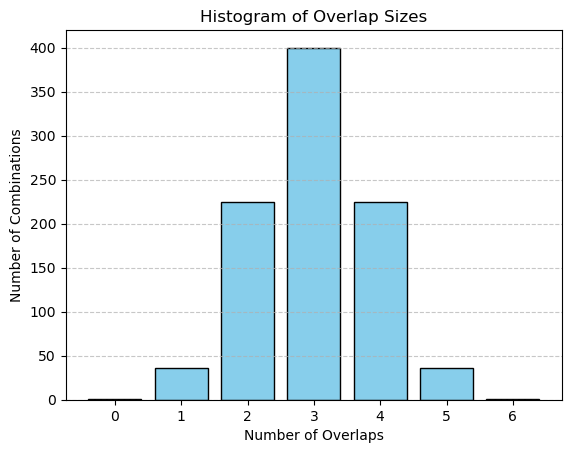

In [34]:
# Plot the histogram
plt.bar(df["Number of Overlaps"], df["Combinations"], color='skyblue', edgecolor='black')
plt.xlabel("Number of Overlaps")
plt.ylabel("Number of Combinations")
plt.title("Histogram of Overlap Sizes")
plt.xticks(df["Number of Overlaps"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram exhibits a symmetrical bell-shaped curve, indicative of a normal distribution. The peak occurs at 3 overlaps, which is the most frequent outcome, while the counts decrease symmetrically as the overlap size moves away from the center toward 0 or 6. This symmetry arises because the experiment involves randomly selecting cups, and the combinations inherently favor a balanced distribution around the midpoint (3 overlaps). Such a distribution is expected due to the combinatorial nature of the problem, where the majority of arrangements are centered around the average case, with fewer possibilities for extreme cases (like all cups being correct or none being correct).

### ANSWER NO2 

If we consider the possibility of selecting at least 5 correct cups (allowing for either 0 or 1 error), the total number of favorable combinations is $36+1=37$. The corresponding percentage is:

$$Probability of at least 5 correct cups= \frac{{(1+36)}}{{924}}≈4.0%$$

In [38]:
# The probability that she (randomly) selects at least five correct cups.
cert_percentage1 = round(((1+36) / 924) * 100, 3)

# Show.
print(cert_percentage1)

4.004


### QUESTION NO3

    Would you accept two errors? Explain.

Now, if we extend this to allow for two errors, we need to consider the probability of selecting at least 4 correct cups (i.e., 2 or fewer errors). The number of favorable combinations for selecting exactly 4 correct cups, 3 correct cups, and 2 correct cups (with 2, 3, or 4 incorrect cups, respectively) will be higher, leading to an increase in the total number of favorable outcomes. if we accept two errors the number of overlaps will increase to 262 over 924 possible combinations:  

$$225+36+1 = 262$$  

This represents the number of ways to select 4, 5, or 6 correct cups (allowing for 0, 1, or 2 errors).

Now, we can calculate the corresponding probability:

$$Probability of at least 4 correct cups= \frac{{(1+36+225)}}{{924}}≈28.4%$$

In [37]:
# The probability that she (randomly) selects at least four correct cups.
cert_percentage2 = round(((1+36+225) / 924) * 100, 3)

# Show.
print(cert_percentage2)

28.355


### ANSWER NO3

Accepting a $28.4%$ chance of success would undermine the significance of the entire experiment, as it would elevate the probability of success to nearly one-third — akin to the chance of selecting the correct card out of three.

# Task 2: numpy's Normal Distribution

![image](images/normal_distribution.png)

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [24]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

### Flipping Several Coins

In [25]:
# Flip a single coin.
coin = ["Tail", "Head"]
flip = np.random.binomial(1, 0.5)  # 0 for Tail, 1 for Head
print(coin[flip])

Head


In [26]:
# Flip a single coin several times.
flips = np.random.binomial(1,0.5,1000)# 1000 flips

# Show.
for flip in flips:
    print(coin[flip])

Head
Head
Head
Tail
Head
Tail
Head
Head
Tail
Head
Tail
Head
Tail
Head
Tail
Head
Tail
Head
Tail
Head
Head
Head
Head
Head
Tail
Tail
Head
Head
Head
Tail
Head
Tail
Tail
Head
Tail
Tail
Tail
Tail
Tail
Tail
Tail
Head
Tail
Tail
Head
Head
Tail
Tail
Tail
Head
Head
Tail
Tail
Head
Head
Tail
Tail
Tail
Tail
Head
Head
Head
Head
Head
Tail
Head
Head
Tail
Tail
Head
Head
Tail
Tail
Head
Head
Tail
Head
Head
Head
Tail
Head
Tail
Head
Head
Tail
Tail
Head
Head
Tail
Tail
Head
Tail
Head
Tail
Tail
Tail
Head
Tail
Tail
Tail
Head
Tail
Head
Head
Head
Head
Tail
Head
Head
Head
Head
Tail
Head
Tail
Tail
Tail
Tail
Tail
Head
Head
Tail
Tail
Tail
Head
Tail
Head
Tail
Head
Tail
Head
Head
Tail
Head
Head
Head
Tail
Tail
Tail
Tail
Tail
Head
Tail
Head
Head
Tail
Head
Head
Head
Tail
Head
Head
Tail
Head
Head
Head
Tail
Tail
Tail
Tail
Head
Tail
Head
Head
Tail
Head
Head
Head
Tail
Tail
Tail
Tail
Head
Tail
Head
Head
Head
Tail
Head
Head
Tail
Tail
Tail
Tail
Head
Head
Tail
Tail
Head
Tail
Tail
Tail
Head
Head
Head
Tail
Tail
Head
Head
Tail
Head


In [27]:
# Count heads.
heads = flips.sum()

# Count tails (total flips - heads)
tails = len(flips) - heads

# Show results
print(f"Heads: {heads}")
print(f"Tails: {tails}")

Heads: 490
Tails: 510


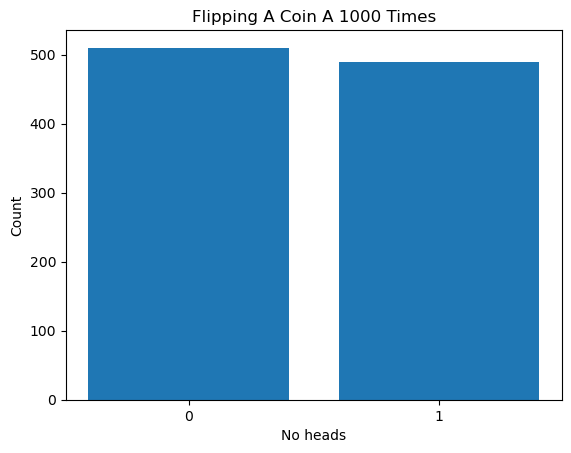

In [28]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1])

# Add title.
ax.set_title('Flipping A Coin A 1000 Times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

In [29]:
# Flip two coins several times.
twoflips = np.random.binomial(2,0.5,1000)# 1000 flips

# Show.
twoflips

array([2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1,
       1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1,
       0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1,

In [30]:
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)

# Show.
uniques, counts

(array([0, 1, 2]), array([242, 531, 227]))

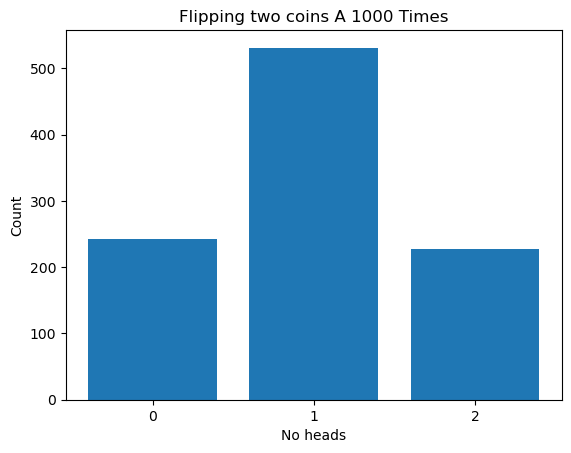

In [31]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Add x labels.
ax.set_xticks([0, 1, 2])

# Add title.
ax.set_title('Flipping two coins A 1000 Times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

In [32]:
# Flip two coins several times keeping the individual results.
twoflipsind = np.random.binomial(1,0.5, (1000, 2))

# Show.
twoflipsind

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 1],
       [1, 1]])

In [33]:
# Count the number of times each value occurs.
np.unique(twoflipsind, return_counts=True, axis =0)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([260, 244, 223, 273]))

In [34]:
# Number of coins to flip.
n = 100

# Number of times to do it.
k = 100 * n

# Flip two coins several times.
nflips = np.random.binomial(n, 0.5, k)

# Count the number of times each value occurs.
uniques, counts = np.unique(nflips, return_counts=True)

# Show.
uniques, counts

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69]),
 array([  1,   1,   3,   3,   6,   9,  18,  29,  36,  82, 115, 142, 237,
        298, 404, 495, 539, 661, 743, 770, 800, 794, 758, 661, 576, 446,
        419, 291, 230, 155, 114,  63,  39,  31,  16,   6,   5,   2,   1,
          1]))

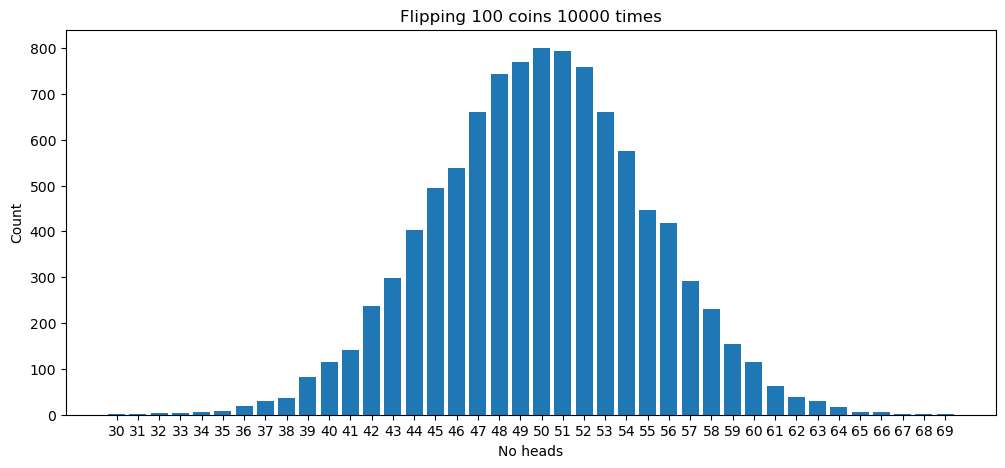

In [35]:
# Create a blank plot.
fig, ax = plt.subplots(figsize = (12, 5))

# Create a bar chart.
ax.bar(uniques, counts)

# Add x labels.
ax.set_xticks(uniques)

# Add title.
ax.set_title(f'Flipping {n} coins {k} times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

### Probability Density Function

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

https://en.wikipedia.org/wiki/Normal_distribution

In [36]:
def f(x, mu=0.0, sigma=1.0):
  # The normalisation constant.
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

In [37]:
# Test the function.
f(0.0) 

0.3989422804014327

In [38]:
# Create an x range.
x = np.linspace(-5, 5, 1001)

# Get an y values.
y = f(x)

# Show.
x, y

(array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ]),
 array([1.48671951e-06, 1.56286711e-06, 1.64275059e-06, ...,
        1.64275059e-06, 1.56286711e-06, 1.48671951e-06]))

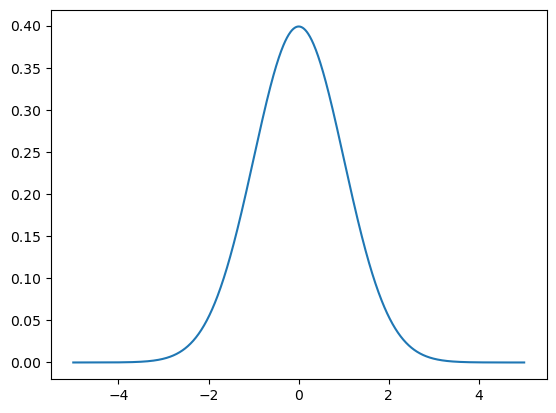

In [39]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y);

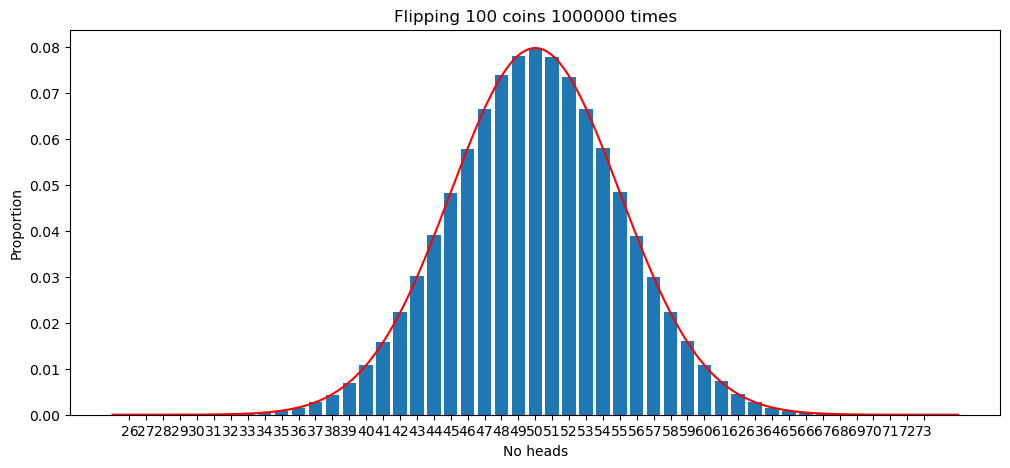

In [40]:
# Number of coins to flip.
n = 100

# Number of times to do it.
k = 10000 * n

# Probability of heads.
p = 0.5

# Flip two coins several times.
nflips = np.random.binomial(n, p, k)

# Count the number of times each value occurs.
uniques, counts = np.unique(nflips, return_counts=True)

# Create a blank plot.
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar chart.
ax.bar(uniques, counts / k)

# Create an x range.
x = np.linspace(25, 75, 1001)

# Get y values.
y = f(x, mu=n*p, sigma=np.sqrt(n * p * (1 - p)))

# Plot the function.
ax.plot(x, y, 'r-')

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title(f'Flipping {n} coins {k} times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Proportion');

### Plots

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [41]:
# Generate normal random sample.
data = np.random.normal(size=6)

# Show.
data

array([ 0.55312262,  0.19097405, -0.22681347,  1.35123733, -1.07326657,
       -1.70955538])

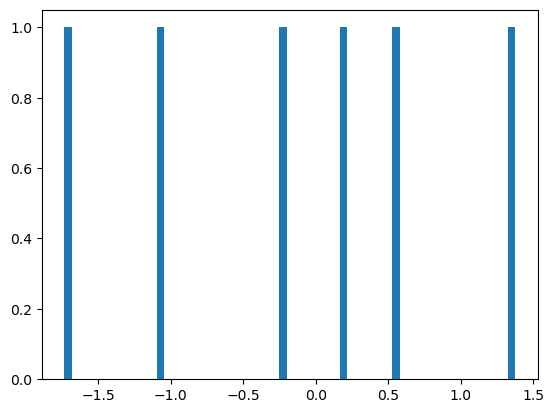

In [42]:
# Create a blank plot.
fig, ax = plt.subplots()

# Count unique values.
counts, uniques = np.unique(data, return_counts=True)

# Create a bar chart.
ax.bar(counts,uniques, width=0.05);

In [43]:
# Generate normal random sample.
data = np.random.normal(size=100)

# Show.
data

array([-0.48255723, -0.39694623, -2.00643859,  0.34181753,  0.15809669,
        0.86749882, -1.53678583,  2.23726234, -0.37075178, -0.72345968,
        0.14347134, -0.6844321 , -0.06988812,  0.0716596 ,  0.39864827,
       -0.54246426, -0.70855415, -0.45228134, -1.33498508, -0.33268585,
       -1.87965338, -1.66740096,  0.63935421, -1.79497442,  2.05403493,
        0.63749211, -0.53963361, -0.91697371, -0.2503515 ,  0.45723355,
        0.85315014, -0.60013584,  0.82461322, -0.5521514 , -0.24474836,
        0.52649016,  0.60328846,  0.46574809, -0.25393066, -0.20132274,
        2.22693679, -0.6849982 ,  0.16196344,  1.08051346,  2.22441425,
       -0.17157361,  1.64068065,  0.62096871, -1.50512793,  0.54422726,
       -0.61237416,  0.27027216,  0.62213115, -0.86467737, -0.76016274,
        1.47143817, -2.23660213, -0.64861316,  0.50894027,  0.22683509,
       -0.02482296, -1.35289514, -0.08444697,  0.53967344,  0.08748253,
        1.78104857, -0.16405272, -0.05752652, -0.37676273,  0.96

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram

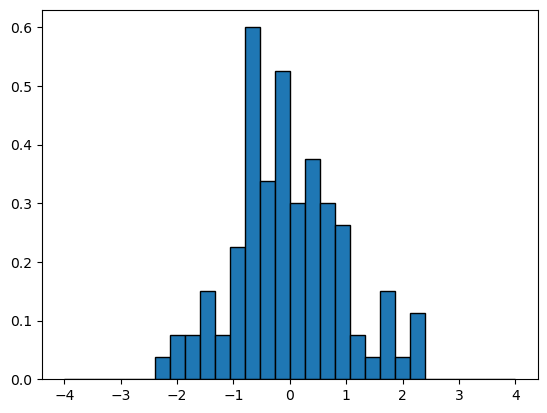

In [44]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(-4,4,31));

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels-graphics-gofplots-qqplot

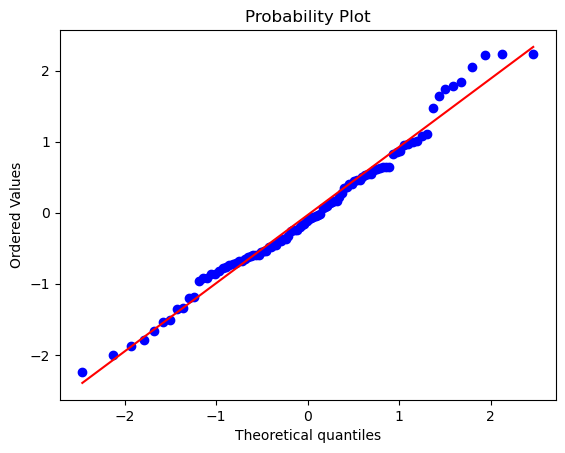

In [45]:
# Create an emptyplot.
fig, ax = plt.subplots()

# Create a qq plot.
stats.probplot(data, dist='norm', plot=ax);

### Shapiro-Wilk Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

In [46]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

ShapiroResult(statistic=0.981798210861143, pvalue=0.18309591267044115)

### Integration

https://en.wikipedia.org/wiki/97.5th_percentile_point

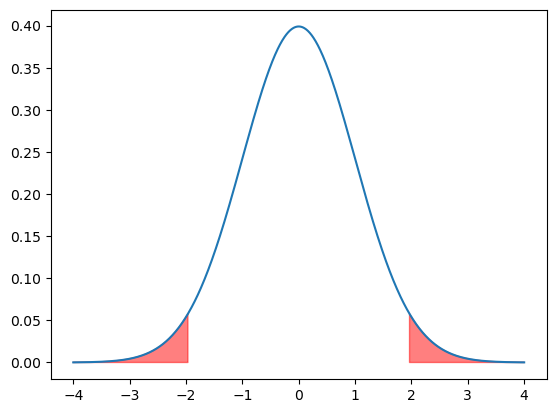

In [47]:
# Adapted from https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

# Create a blank plot.
fig, ax = plt.subplots()

# X values.
x = np.linspace(-4.0,4.0, 1000)

# Plot the normal distribution.
plt.plot(x, stats.norm.pdf(x))

plt.fill_between(x, stats.norm.pdf(x), where=(x< -1.96) | (x>1.96), color='red', alpha=0.5);

### Central Limit Theorem

# Task 3: t-Test Calculation

![image](images/t_Test.png)

## $t$-Tests

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |





Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

In [48]:
# numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

### Normal Data

[numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html#numpy-random-normal)

In [49]:
# Group A.
group_a = np.random.normal(0.07, 0.02, 30)

# Group B.
group_b = np.random.normal(0.03, 0.02, 30)

group_a, group_b

(array([0.06670032, 0.05048637, 0.06999552, 0.03342809, 0.08645598,
        0.05690933, 0.06653686, 0.06527186, 0.07637827, 0.0715601 ,
        0.08919667, 0.11057633, 0.07638789, 0.07930298, 0.0311697 ,
        0.04599922, 0.04543586, 0.05228751, 0.06381022, 0.07417357,
        0.09518086, 0.06614381, 0.09200866, 0.06170806, 0.07440617,
        0.06796848, 0.07528105, 0.10328979, 0.06415098, 0.08224799]),
 array([ 0.03673873,  0.02029894,  0.03077312,  0.05132551, -0.00118117,
         0.02218417,  0.04903239,  0.05082485,  0.01561504,  0.03877417,
        -0.02030455,  0.01356152,  0.06960851,  0.01547485,  0.05385952,
         0.05378197,  0.0584334 ,  0.03385922,  0.00629069,  0.04555039,
         0.04342744, -0.02764068,  0.04794102,  0.02534629,  0.0157008 ,
        -0.00579708,  0.02955094,  0.01866463,  0.03610352,  0.02796815]))

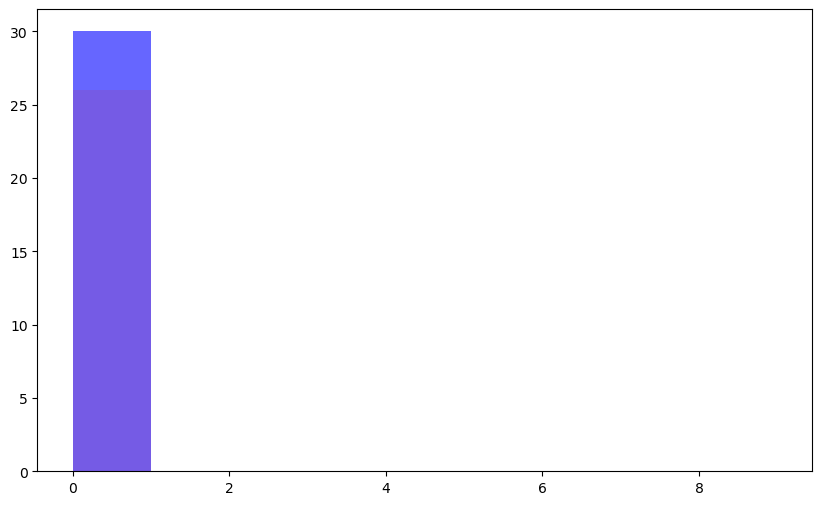

In [50]:
# Create an empty dataframe.
fig, ax = plt.subplots(figsize= (10, 6))

# Plot the histogram for Group A.
ax.hist(group_a, bins=range(10), alpha=0.6, color='b', label="Group A")


# Plot the histogram for Group B with a different color.
ax.hist(group_b, bins=range(10), alpha=0.1, color='r', label="Group B")

# Show the plot.
plt.show()

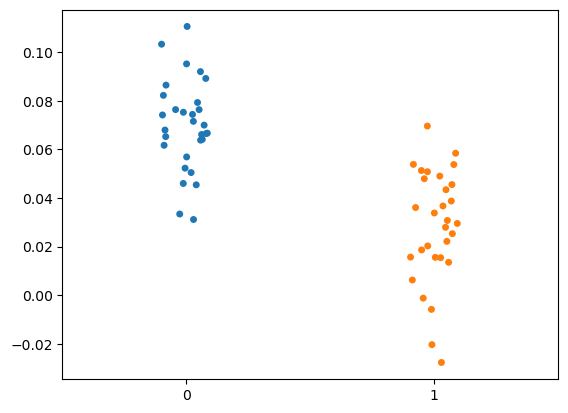

In [51]:
# Create a stripplot.
sns.stripplot(data=[group_a, group_b]);

<Axes: >

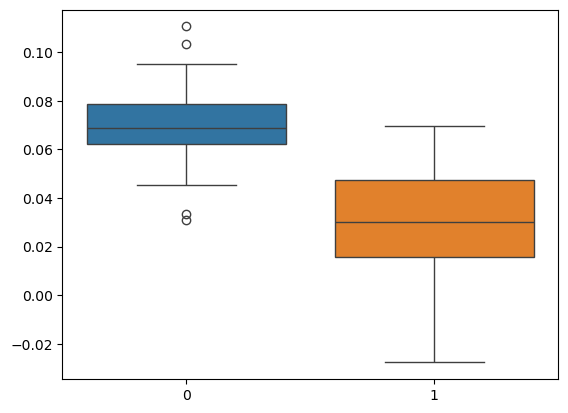

In [52]:
# Blox plot.
sns.boxplot(data=[group_a, group_b])

### Independent Samples $t$-Test

[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

**Null Hypothesis**: the population means are equal 

In [53]:
# Perform a t-test.
stats.ttest_ind(group_a, group_b)

TtestResult(statistic=7.629459557521053, pvalue=2.564670530255634e-10, df=58.0)

### Paired Samples $t$-Test

In [54]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

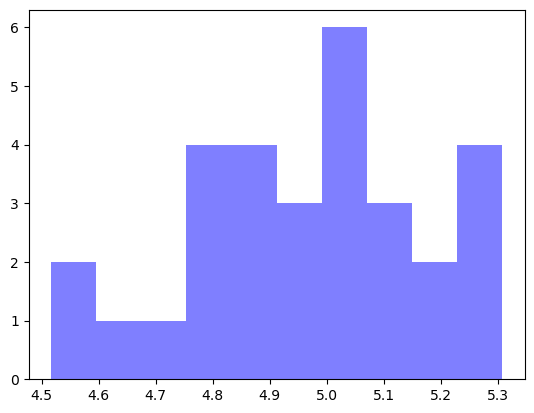

In [55]:
# Plotting normally distributed values with histogram.
plt.hist(group_a, color='blue', alpha=0.5, label= 'Group A');

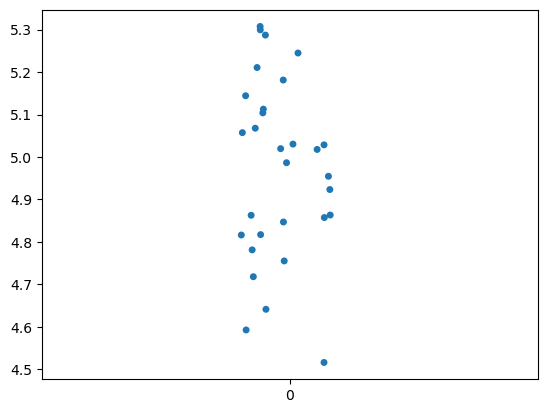

In [56]:
# Strip plot.
sns.stripplot(data=[group_a]);

In [57]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

# Add normally distributed values.
group_b = group_a + np.random.normal(0.0, 0.1, 30)

(<Axes: >,)

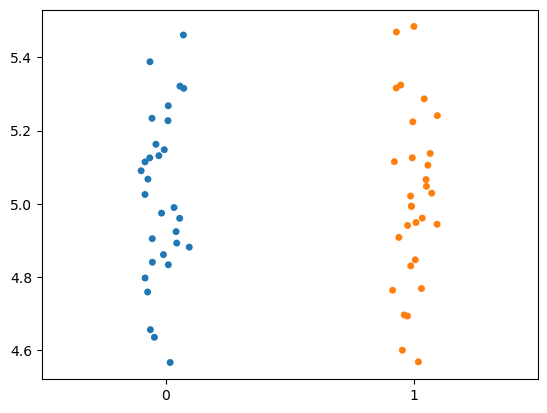

In [58]:
# Strip plot.
sns.stripplot(data=[group_a, group_b]),

### scipy.stats.ttest_rel

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel

In [59]:
# Paired samples t-test.
stats.ttest_rel(group_a, group_b)

TtestResult(statistic=0.2072740257295187, pvalue=0.837244475632508, df=29)

The *Null* hypothesis is not going to be rejected because the mean has not been changed (5 for both groups).

# Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called *no_type_ii* and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to *no_type_ii* whenever a type II error occurs.

Summarize and explain your results.

![image](images/anova.png)

**Analysis of Variance**

Where "variance" is the square of standard deviation (how wide the curve of the bell tends to be).  

### More Samples

In [60]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

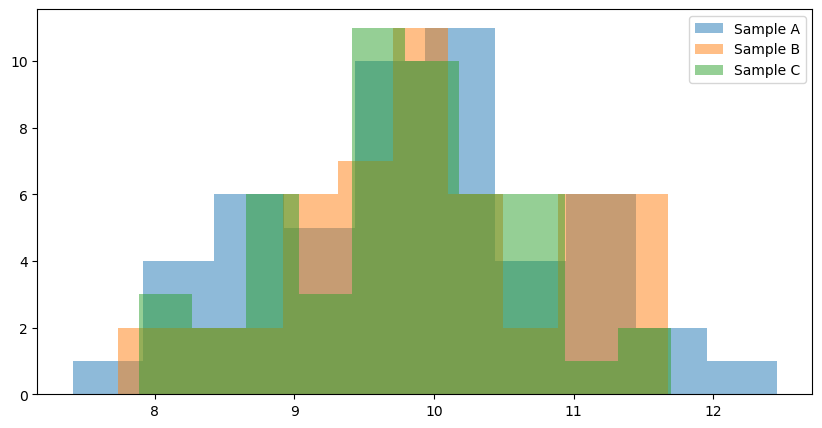

In [61]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend
ax.legend();

The *Null* hypothesis of a $t$-test typically states that the means of the two groups are equal.  

• If $p-value < 0.05$:  
• The difference between the two means is statistically significant.  
-> You have enough evidence to reject the null hypothesis, concluding that the two datasets likely do not have the same mean.  
• If $p-value ≥ 0.05$:  
• The difference between the means is not statistically significant.  
-> You fail to reject the null hypothesis, meaning there’s insufficient evidence to claim the means are different.  

In [62]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(-0.3923177400659304, 0.6956753966641183)

Swapping the two samples, the sign of the t-statistic changes, but its magnitude and the p-value stay the same because the p-value is based on the absolute value of the t-statistic (it tests the null hypothesis that the means are equal): the sign change reflects the change in direction of the difference between the sample means.

In [63]:
# Independent samples t-test on sample_a and sample_b swapped.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(0.3923177400659304, 0.6956753966641183)

In [64]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(0.5840280061190665, 0.56054339793341)

In [65]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(1.0731532365287677, 0.28583779881971055)

### $n$ Samples

If you have *N* samples, for example 4, how many different $t-tests$ could you perform?  

For 4 samples, you could perform 6 pairwise t-tests.

Supposing your samples are labeled as A,B,C,D, the possible t-tests are:

1. A vs. B
2. A vs. C
3. A vs. D
4. B vs. C
5. B vs. D
6. C vs. D

To obtain the number of combinations the following formula called the *combination formula* is applied:
 
$\binom nk=^nC_k=\frac{n!}{k!(n-k)!}$  

In mathematics, a combination is a selection of items from a set that has distinct members, such that the order of selection does not matter (unlike permutations).

In [66]:
# Number of samples.
n = 4

In [67]:
# Show the sample labels.
print(list((range(4))))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]  

The $n$ chooses $k$ formula also called the *binomial* coefficient:  

$$  {n \choose k} = \frac{n!}{k!(n - k)!} $$

In [68]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [69]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [70]:
# Suppose we had 7 samples.
n = 7
math.comb(n, 2)

21

### Type I Errors

In [71]:
def simulate_ttest(alpha=0.05):
    # Generate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate a random sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [72]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range (100000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

5038

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

In [73]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [74]:
# Create dataframe.
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,27.837650,23.441718,22.815770
1,21.295759,21.772394,19.797759
2,32.745081,20.879650,20.148457
3,27.932581,21.241852,22.865186
4,24.691396,23.482391,24.276195
5,22.292904,23.789194,30.838198
6,36.267266,23.412906,27.472476
7,22.273003,19.352635,19.234022
8,28.843363,21.975697,29.854278
9,37.671557,23.311098,22.075189


In [75]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,28.185056,22.265954,23.937753
std,5.831575,1.467277,4.146377
min,21.295759,19.352635,19.234022
25%,22.892527,21.374488,20.630140
50%,27.885116,22.643397,22.840478
75%,31.769652,23.434515,26.673406
max,37.671557,23.789194,30.838198


In [76]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(5.235945431398244, 0.011978021858674416)

In [77]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      5.919     0.011     1.243    10.595
 (0 - 2)      4.247     0.080    -0.429     8.923
 (1 - 0)     -5.919     0.011   -10.595    -1.243
 (1 - 2)     -1.672     0.653    -6.348     3.004
 (2 - 0)     -4.247     0.080    -8.923     0.429
 (2 - 1)      1.672     0.653    -3.004     6.348



### Presenting the data

In [78]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

# Concatenate the arrays.
data = np.concatenate([beginner, intermediate, advanced])

In [79]:
# Create the labels.
labels = ['Beginner'] * 10 + ['Intermediate'] * 10 + ['Advanced'] * 10

In [80]:
# Create data frame.
df = pd.DataFrame({'Course': labels, 'Time': data})

# Show.
df

,Course,Time
0,Beginner,25.960203
1,Beginner,26.689237
2,Beginner,27.230621
3,Beginner,30.932521
4,Beginner,30.430800
5,Beginner,23.825539
6,Beginner,29.190196
7,Beginner,24.691721
8,Beginner,26.007452
9,Beginner,29.488896


In [81]:
# Pull the groups out.
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']

# Perform ANOVA.
f, p = stats.f_oneway(b_times, i_times, a_times)

# Show.
f, p

(13.719796299893037, 7.736777700899948e-05)

In [82]:
# Tukey's HSD.
res = stats.tukey_hsd(b_times, i_times, a_times)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      5.284     0.000     2.390     8.178
 (0 - 2)      5.306     0.000     2.412     8.200
 (1 - 0)     -5.284     0.000    -8.178    -2.390
 (1 - 2)      0.021     1.000    -2.873     2.915
 (2 - 0)     -5.306     0.000    -8.200    -2.412
 (2 - 1)     -0.021     1.000    -2.915     2.873



## End